 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [177]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [178]:
# Before we begin ...
# read all required .csv files
whale_path = Path("./Resources/whale_returns.csv")
algo_path = Path("./Resources/algo_returns.csv")
sp60_path = Path("./Resources/sp_tsx_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [179]:
# Reading "whale" data into DataFrame
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [180]:
# Reading whale returns ... top 5
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [181]:
# Reading whale returns ... bottom 5
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [182]:
# Reading whale returns ... sample of 7
whale_returns.sample(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2018-02-12,0.015751,0.006872,0.009962,0.016198
2016-07-13,-0.002239,0.005425,0.011063,-0.004848
2018-09-12,0.002715,0.009984,0.014785,0.003880
2017-10-04,0.000105,0.010585,-0.000932,-0.004590
2018-11-26,0.017137,-0.002214,0.007141,0.037717
2018-07-05,0.006601,0.005280,0.014716,0.008481
2016-11-01,-0.006986,0.003359,-0.007216,-0.009591


In [183]:
# Reading whale returns ... get a feel for the data
whale_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [184]:
# Count nulls
whale_returns.isna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [185]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [186]:
# Sort by Date
whale_returns.sort_index(inplace=True)
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [187]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [188]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [189]:
# 6 dodgy values found ...
# ... drop 'em
algo_returns.dropna(inplace=True)

# Check again for fun
algo_returns.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [190]:
# Sort by Date
algo_returns.sort_index(inplace=True)
algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [209]:
# Reading S&P TSX 60 Closing Prices
sp60_close = pd.read_csv(sp60_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp60_close.sample(5)

,Close
Date,
2019-03-26,"$16,155.16"
2019-02-28,"$15,999.01"
2018-05-15,"$16,097.81"
2018-12-04,"$15,063.59"
2012-10-02,"$12,391.23"


In [192]:
# Describe the data
sp60_close.describe()

,Close
count,1818
unique,1814
top,"$15,657.63"
freq,2


In [196]:
# Check Data Types
sp60_close.dtypes

Close    object
dtype: object

In [197]:
# The data type is not as it should 
# be for the column labelled "Close"
# We need to dig a little deeper
# with the "Close" column
sp60_close["Close"].value_counts()

$15,657.63    2
$14,533.57    2
$16,371.55    2
$16,074.30    2
$12,613.05    1
             ..
$14,904.91    1
$15,040.30    1
$12,153.10    1
$16,103.51    1
$14,563.38    1
Name: Close, Length: 1814, dtype: int64

In [198]:
# Okay, looks alright, although obvious there are duplicates
# as well as there being characters within what is expected
# to be pricing/numerical data.
#
# Duplicates are not an issue, as it is entirely possible
# that a closing price can be repeated over time
sp60_close.loc[sp60_close["Close"] == "$15,657.63"]

,Close
Date,
2014-09-03,"$15,657.63"
2017-03-29,"$15,657.63"


In [199]:
# Remove the dodgy alphanumeric characters (except '.')
# and convert into correct pricing data
sp60_close["Close"] = sp60_close["Close"].str.replace('[^.\w]',"").astype('float')

In [200]:
# Check that it is all good
sp60_close.sample(5)

,Close
Date,
2014-09-26,15026.77
2013-12-05,13200.40
2015-01-22,14763.98
2015-07-07,14624.50
2015-03-13,14731.50


In [201]:
# Calculate Daily Returns
# ... and store in a new "returns" DataFrame
sp60_returns = sp60_close.pct_change()
sp60_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [202]:
# Drop nulls
sp60_returns.dropna(inplace=True)

In [204]:
# Sort by Date
sp60_returns.sort_index(inplace=True)

In [205]:
# Rename `Close` Column to be specific to this portfolio.
sp60_returns.rename(columns={'Close':'S&P TSX 60'}, inplace=True)
sp60_returns.sample(5)

,S&P TSX 60
Date,
2013-05-21,0.010258
2015-06-26,-0.006002
2019-09-19,0.003456
2013-03-18,-0.003762
2018-03-02,-0.000608


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [206]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns,algo_returns,sp60_returns], axis='columns', join='inner')
all_returns.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2018-06-08,0.001795,0.007805,0.010083,0.008575,-0.001353,0.001202,0.000612
2019-03-07,-0.007841,0.003632,-0.013210,-0.019471,-0.001560,-0.003298,-0.002210
2015-04-23,0.001067,0.002972,0.000736,0.007061,-0.001626,0.005186,0.005722
2016-10-18,0.004068,0.009753,0.002076,0.004249,0.003451,0.006817,0.010669
2016-12-12,-0.007064,0.001338,0.001946,-0.011927,-0.005713,-0.006288,-0.001600
2018-07-31,0.010458,0.005690,0.001362,0.004780,0.007366,0.006083,0.005417
2015-09-30,0.017704,0.016845,0.011873,0.035166,0.020916,0.015349,0.020710
2018-05-30,0.004653,0.004131,0.019950,0.006914,-0.000132,0.011756,0.007916
2019-02-14,0.002795,0.001987,-0.004381,-0.003987,0.002285,-0.002618,0.004432


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Portfolio Returns - 2015 to 2019'}, xlabel='Date'>

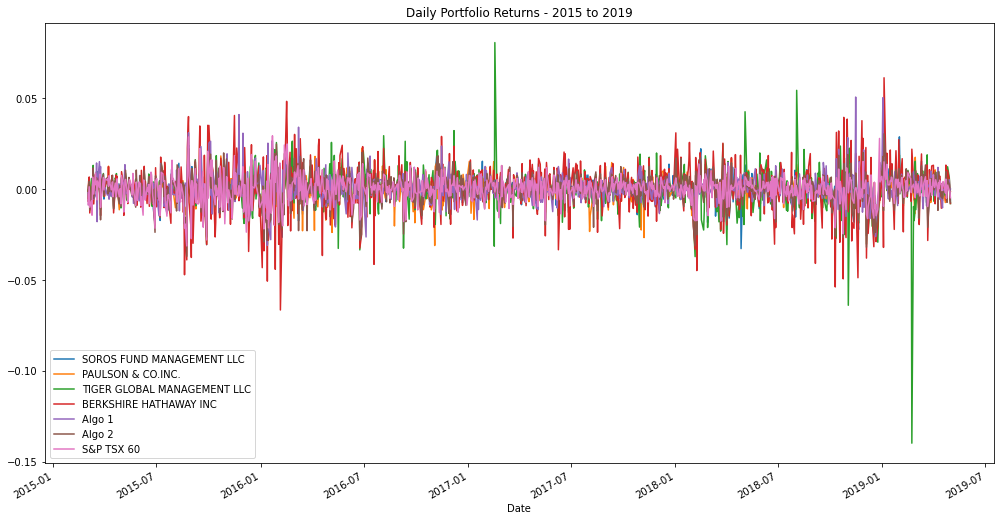

In [231]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(17,9), title="Daily Portfolio Returns - 2015 to 2019")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Portfolio Returns (%) vs. S&P TSX 60 - 2015 to 2019'}, xlabel='Date'>

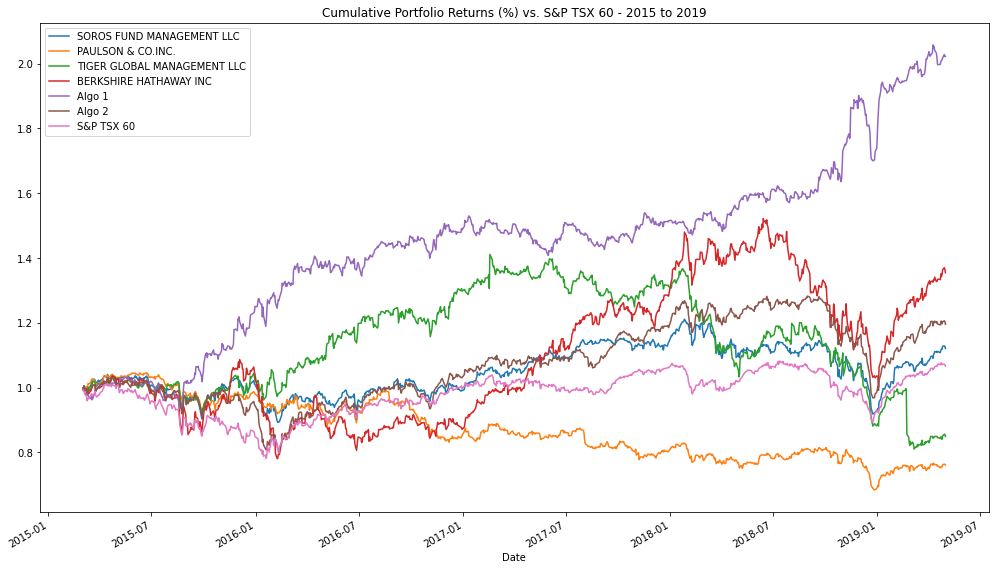

In [234]:
# Calculate cumulative returns of all portfolios
all_cumu_rets = (1 + all_returns).cumprod()

# Plot cumulative returns
all_cumu_rets.plot(figsize=(17,10), title="Cumulative Portfolio Returns (%) vs. S&P TSX 60 - 2015 to 2019")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Cumulative Portfolio Returns (%) vs. S&P TSX 60'}>

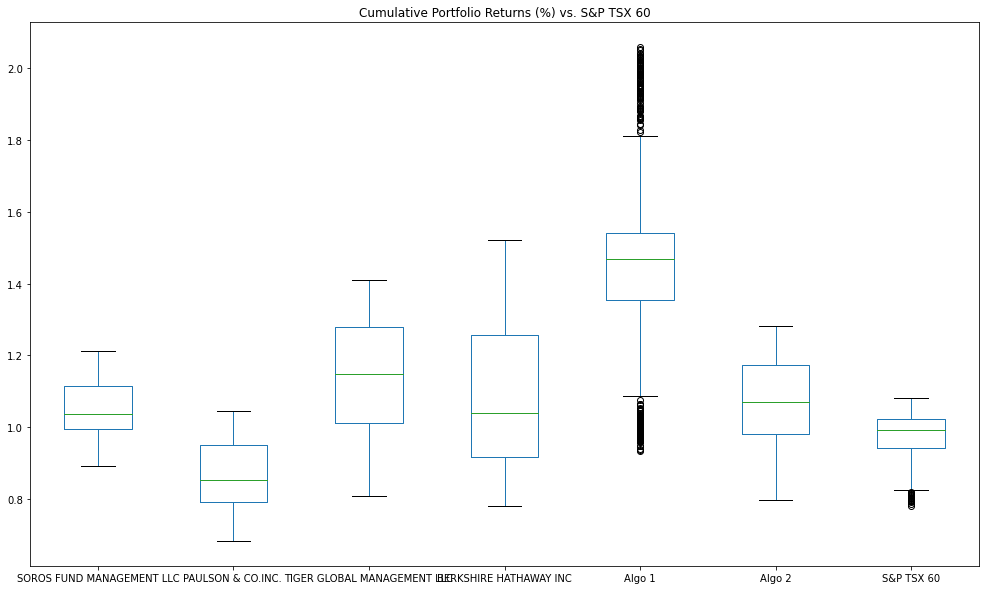

In [240]:
# Box plot to visually show risk
all_cumu_rets.plot(kind="box", figsize=(17,10), title="Cumulative Portfolio Returns (%) vs. S&P TSX 60")

### Calculate Standard Deviations

In [239]:
# Calculate the daily standard deviations of all portfolios
all_returns.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!